In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data (e.g., MNIST or CIFAR-10)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = x_test.astype('float32') / 255.
x_test = np.expand_dims(x_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Add random noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [4]:
# Build model
input_img = Input(shape=(28, 28, 1))

In [5]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


In [6]:
# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [7]:
# Compile
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [8]:
# Train
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 266ms/step - loss: 0.2367 - val_loss: 0.1138
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 120s 257ms/step - loss: 0.1132 - val_loss: 0.1075
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 257ms/step - loss: 0.1080 - val_loss: 0.1048
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 121s 259ms/step - loss: 0.1051 - val_loss: 0.1025
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 120s 256ms/step - loss: 0.1028 - val_loss: 0.1006
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 256ms/step - loss: 0.1013 - val_loss: 0.0996
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 257ms/step - loss: 0.1002 - val_loss: 0.0989
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 255ms/step - loss: 0.0995 - val_loss: 0.0982
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 255ms/step - loss: 0.0989 - val_loss: 0.0973
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 257ms/step - loss: 0.0982 - val_loss: 0.0969


In [9]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


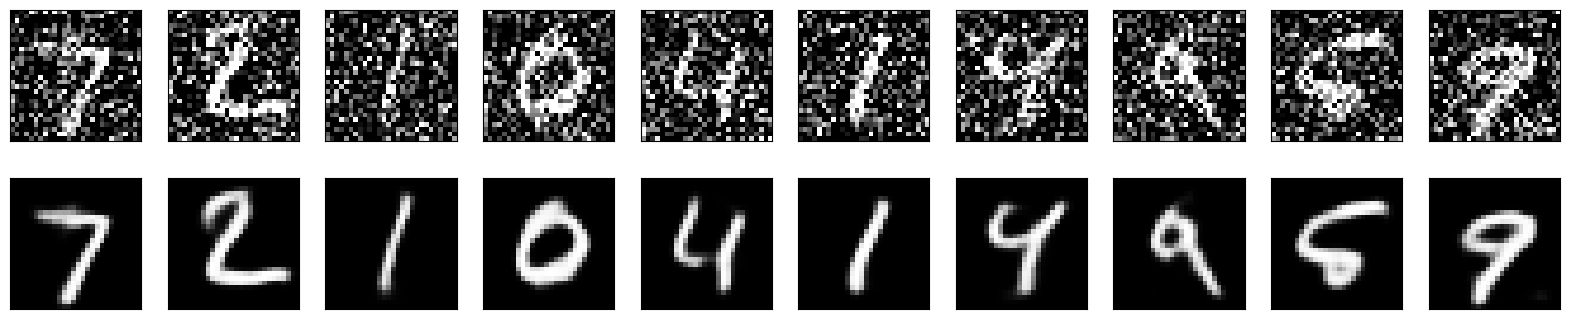

In [12]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
loss = autoencoder.evaluate(x_test_noisy, x_test, verbose=0)
print('Test Loss:', loss)

Test Loss: 0.0968766137957573


In [14]:
decoded_imgs = autoencoder.predict(x_test_noisy)
diff = np.abs(decoded_imgs - x_test)
threshold = 0.1  # Adjust this threshold as needed
correct_predictions = np.sum(diff < threshold)
accuracy = correct_predictions / (x_test.shape[0] * x_test.shape[1] * x_test.shape[2])
print(f"Accuracy based on threshold: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
Accuracy based on threshold: 0.8873031887755102
